In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gs = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\goalscorers.csv")

In [3]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [4]:
newgs = gs.convert_dtypes()

In [5]:
newgs['date'] = pd.to_datetime(newgs['date'])

In [6]:
newgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       44362 non-null  datetime64[ns]
 1   home_team  44362 non-null  string        
 2   away_team  44362 non-null  string        
 3   team       44362 non-null  string        
 4   scorer     44313 non-null  string        
 5   minute     44103 non-null  Int64         
 6   own_goal   44362 non-null  boolean       
 7   penalty    44362 non-null  boolean       
dtypes: Int64(1), boolean(2), datetime64[ns](1), string(4)
memory usage: 2.2 MB


In [7]:
cat = newgs.select_dtypes(include=['string','object'])
print(cat)

       home_team away_team       team            scorer
0          Chile   Uruguay    Uruguay   José Piendibene
1          Chile   Uruguay    Uruguay  Isabelino Gradín
2          Chile   Uruguay    Uruguay  Isabelino Gradín
3          Chile   Uruguay    Uruguay   José Piendibene
4      Argentina     Chile  Argentina     Alberto Ohaco
...          ...       ...        ...               ...
44357     Canada   Uruguay    Uruguay       Luis Suárez
44358  Argentina  Colombia  Argentina  Lautaro Martínez
44359      Spain   England      Spain     Nico Williams
44360      Spain   England    England       Cole Palmer
44361      Spain   England      Spain   Mikel Oyarzabal

[44362 rows x 4 columns]


In [8]:
num = newgs.select_dtypes(include=['Int64','boolean','datetime64'])
print(num)

            date  minute  own_goal  penalty
0     1916-07-02      44     False    False
1     1916-07-02      55     False    False
2     1916-07-02      70     False    False
3     1916-07-02      75     False    False
4     1916-07-06       2     False    False
...          ...     ...       ...      ...
44357 2024-07-13      90     False    False
44358 2024-07-14     112     False    False
44359 2024-07-14      47     False    False
44360 2024-07-14      73     False    False
44361 2024-07-14      86     False    False

[44362 rows x 4 columns]


<Axes: xlabel='scorer'>

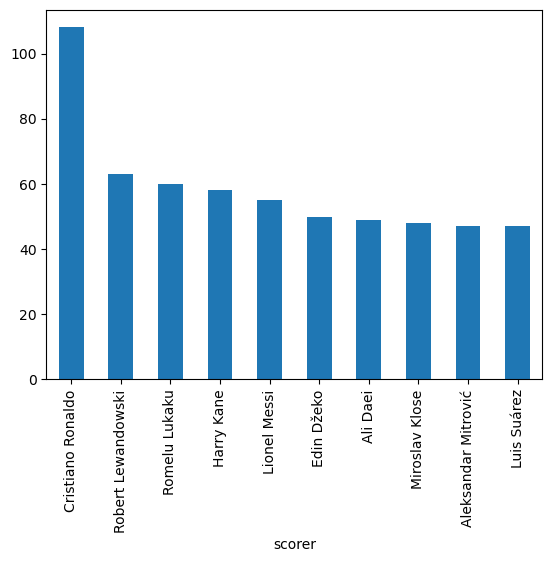

In [9]:
newgs['scorer'].value_counts().head(10).plot.bar()

In [10]:
player = newgs[newgs['scorer'] == 'Cristiano Ronaldo'].iloc[0]

print("Cristiano Ronaldo:")
print(f"Team: {player['team']}")
print(f"Away Team: {player['away_team']}")
print(f"Home Team: {player['home_team']}")
print(f"Own Goals: {player['own_goal']}")
print(f"Penalty: {player['penalty']}")
print(f"Minute: {player['minute']}")

Cristiano Ronaldo:
Team: Portugal
Away Team: Greece
Home Team: Portugal
Own Goals: False
Penalty: False
Minute: 90


C:\Users\drish\AppData\Local\Temp\ipykernel_8480\2762871734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newgs['minute'])


<Axes: xlabel='minute', ylabel='Density'>

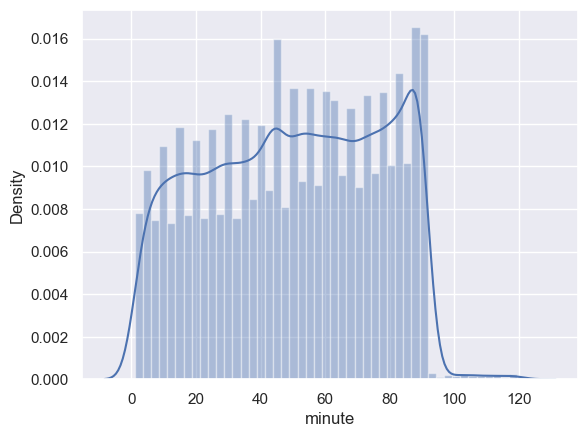

In [11]:
sns.set()
sns.distplot(newgs['minute'])

In [12]:
newgs['minute'].skew()

-0.09603481388688254

In [13]:
own_goal=newgs['own_goal'].value_counts()
own_goal

own_goal
False    43541
True       821
Name: count, dtype: Int64

own_goal
False    43541
True       821
Name: count, dtype: Int64


C:\Users\drish\AppData\Local\Temp\ipykernel_8480\1142590211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=own_goal.index, y=own_goal.values,palette='Set2')


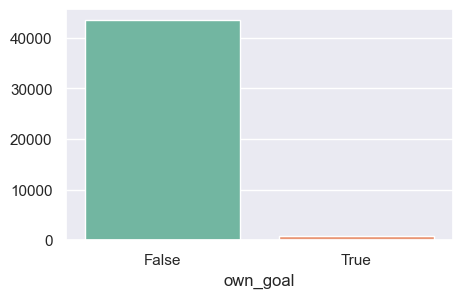

In [14]:
sns.set()
plt.figure(figsize=(5,3))
sns.barplot(x=own_goal.index, y=own_goal.values,palette='Set2')
print (own_goal)
plt.show()

penalty
False    41400
True      2962
Name: count, dtype: Int64


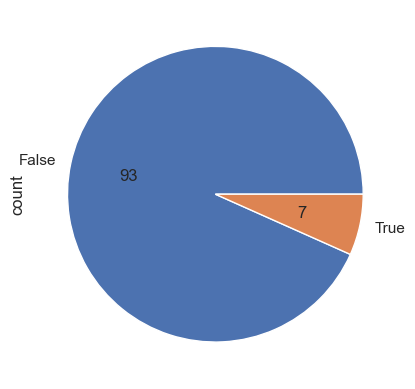

In [15]:
no_of_penalties=newgs['penalty'].value_counts()
no_of_penalties.plot(kind='pie',autopct='%1.f')
print (no_of_penalties)

In [16]:
res = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\results.csv")

In [17]:
so = pd.read_csv(r"C:\Users\drish\Desktop\football mentorship\football\archive\shootouts.csv")

In [18]:
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [21]:
res['home_team'].value_counts()['Portugal']

359

In [22]:
res['away_team'].value_counts()['Portugal']

316

In [23]:
res['country'].value_counts()['Portugal']

413

In [26]:
df_home_portugal= res.loc[res['home_team'] == 'Portugal', ['home_team', 'home_score']].reset_index(drop=True)
print(df_home_portugal)

    home_team  home_score
0    Portugal           1
1    Portugal           1
2    Portugal           3
3    Portugal           4
4    Portugal           2
..        ...         ...
354  Portugal           1
355  Portugal           3
356  Portugal           2
357  Portugal           0
358  Portugal           0

[359 rows x 2 columns]


In [71]:
portugal_home=df_home_portugal['home_score'].max()

In [27]:
df_away_portugal = res.loc[res['away_team'] == 'Portugal', ['away_team', 'away_score']].reset_index(drop=True)
print(df_away_portugal)

    away_team  away_score
0    Portugal           1
1    Portugal           0
2    Portugal           2
3    Portugal           1
4    Portugal           1
..        ...         ...
311  Portugal           5
312  Portugal           2
313  Portugal           0
314  Portugal           3
315  Portugal           0

[316 rows x 2 columns]


In [72]:
portugal_away=df_away_portugal['away_score'].max()

Highest count for Home Score for Portugal: 9
Highest count for Away Score for Portugal: 7


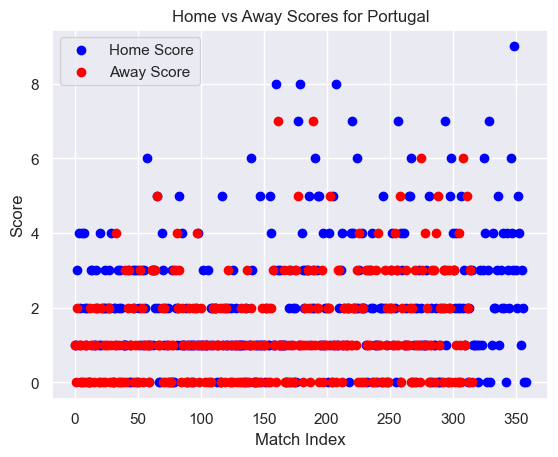

In [73]:
print(f"Highest count for Home Score for Portugal: {portugal_home}") 
print(f"Highest count for Away Score for Portugal: {portugal_away}")
plt.scatter(df_home_portugal.index, df_home_portugal['home_score'], label='Home Score', color='blue')
plt.scatter(df_away_portugal.index, df_away_portugal['away_score'], label='Away Score', color='red')

plt.xlabel('Match Index')
plt.ylabel('Score')
plt.title('Home vs Away Scores for Portugal')

plt.legend()

plt.show()

In [29]:
df_home_greece= res.loc[res['home_team'] == 'Greece', ['home_team', 'home_score']].reset_index(drop=True)
print(df_home_greece)

    home_team  home_score
0      Greece           2
1      Greece           6
2      Greece           2
3      Greece           1
4      Greece           2
..        ...         ...
304    Greece           0
305    Greece           2
306    Greece           2
307    Greece           5
308    Greece           2

[309 rows x 2 columns]


In [74]:
greece_home=df_home_greece['home_score'].max()

In [30]:
df_away_greece= res.loc[res['away_team'] == 'Greece', ['away_team', 'away_score']].reset_index(drop=True)
print(df_home_greece)

    home_team  home_score
0      Greece           2
1      Greece           6
2      Greece           2
3      Greece           1
4      Greece           2
..        ...         ...
304    Greece           0
305    Greece           2
306    Greece           2
307    Greece           5
308    Greece           2

[309 rows x 2 columns]


In [75]:
greece_away=df_away_greece['away_score'].max()

Highest count for Home Score for Greece: 8
Highest count for Away Score for Greece: 5


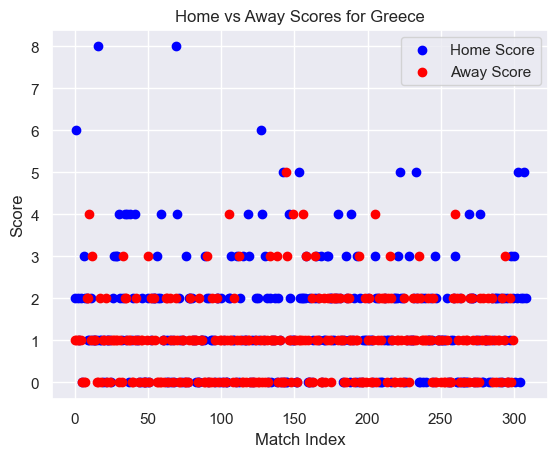

In [76]:
print(f"Highest count for Home Score for Greece: {greece_home}") 
print(f"Highest count for Away Score for Greece: {greece_away}")
plt.scatter(df_home_greece.index, df_home_greece['home_score'], label='Home Score', color='blue')
plt.scatter(df_away_greece.index, df_away_greece['away_score'], label='Away Score', color='red')
plt.xlabel('Match Index')
plt.ylabel('Score')
plt.title('Home vs Away Scores for Greece')

plt.legend()

plt.show()

In [46]:
df_country_greece= res.loc[res['country'] == 'Greece', ['country', 'tournament']].reset_index(drop=True)

In [52]:
df_country_portugal= res.loc[res['country'] == 'Portugal', ['country', 'tournament']].reset_index(drop=True)

In [54]:
X_greece = df_country_greece.value_counts().reset_index() 
X_portugal = df_country_portugal.value_counts().reset_index()

C:\Users\drish\AppData\Local\Temp\ipykernel_8480\431007846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tournament', y='count', data=X_greece, palette='viridis', ax=axes[0])
C:\Users\drish\AppData\Local\Temp\ipykernel_8480\431007846.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tournament', y='count', data=X_portugal, palette='magma', ax=axes[1])


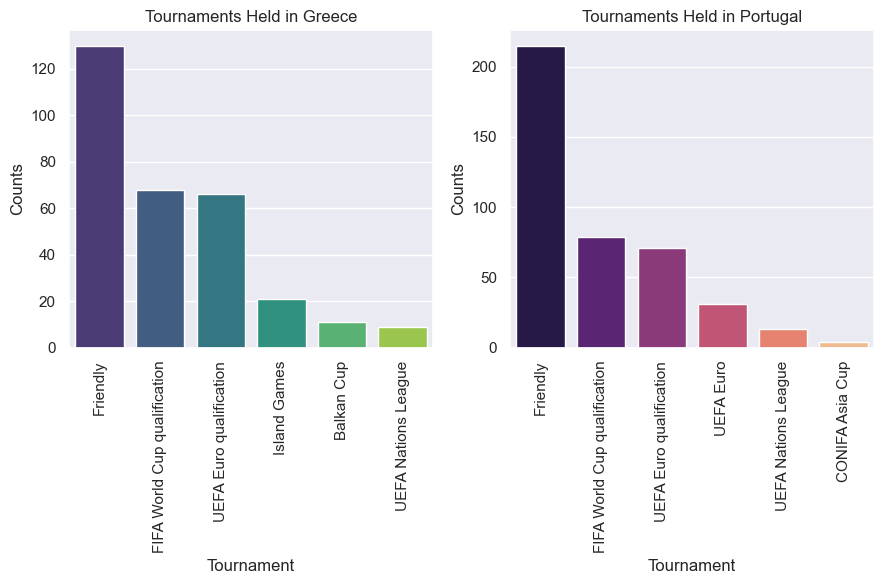

In [83]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 6))

# Greece subplot
sns.barplot(x='tournament', y='count', data=X_greece, palette='viridis', ax=axes[0])
axes[0].set_title('Tournaments Held in Greece')
axes[0].set_xlabel('Tournament')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=90)

# Portugal subplot
sns.barplot(x='tournament', y='count', data=X_portugal, palette='magma', ax=axes[1])
axes[1].set_title('Tournaments Held in Portugal')
axes[1].set_xlabel('Tournament')
axes[1].set_ylabel('Counts')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
so.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [121]:
so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           644 non-null    object
 1   home_team      644 non-null    object
 2   away_team      644 non-null    object
 3   winner         644 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [122]:
so_home_portugal= so.loc[so['winner'] == 'Portugal', ['home_team','away_team', 'winner']].reset_index(drop=True)
print(so_home_portugal)

  home_team away_team    winner
0  Portugal   England  Portugal
1   England  Portugal  Portugal
2    Poland  Portugal  Portugal
3  Portugal  Slovenia  Portugal


In [94]:
so.value_counts('winner')["Portugal"]

4